Численные методы
Аппроксимация и интерполяция функций

In [13]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import scipy.interpolate
from scipy import stats
import scipy as sp
from __future__ import print_function
import math
from scipy.optimize import curve_fit

Задача 1

Создать csv файл с значениями x и y

Получить значения x и y из csv файла

In [2]:
number_of_rows = int(input("Введите число строк: "))
user_interpolation_point = float(input('Введите точку интерполяции: '))
with open('MG.csv', 'w') as f: 
    writer = csv.writer(f)
    xy = np.random.rand(2, number_of_rows)
    writer.writerow(xy[0])
    writer.writerow(xy[1])

Введите число строк: 100
Введите точку интерполяции: 0.9


In [3]:
file = open('MG.csv')
csvreader = csv.reader(file)
rows = []
for file_row in csvreader:
        if len(file_row) > 1:
            rows.append(file_row)        
x_file = [float(xelements) for xelements in rows[0]]
y_file = [float(yelements) for yelements in  rows[1]]

Задание 1

Написать (добавить в собственный класс/библиотеку) следующие
функции:

1. Интерполяция методом Лагранжа (для равноотстоящих и
неравноотстоящих узлов)

Формат входных данных:

а) CSV файл с массивом точек в формате [x i ,y i ] или массив точек в
формате [x,y];


Формат выходных данных:

а) Массив точек в формате [x i , y i , f i ] (fi – значение интерполированной
функции в точках) +

б) Интерполяционный многочлен Лагранжа - в формате строки
содержащий каноничную форму многочлена с вычисленными
коэффициентами, отсортированный в порядке убывания степеней x,
для которых определенные для функции коэффициенты отличны от
нуля)

32169153686.944435


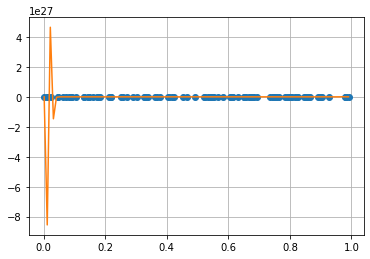

In [4]:
def lagranz(x,y,t):
    z=0
    for j in range(len(y)):
        p1=1; p2=1
        for i in range(len(x)):
            if i==j:
                p1=p1*1; p2=p2*1   
            else: 
                p1=p1*(t-x[i])
                p2=p2*(x[j]-x[i])
        z=z+y[j]*p1/p2
    return z
xnew=np.linspace(np.min(x_file),np.max(x_file),100)
ynew=[lagranz(x_file,y_file,i) for i in xnew]
print(lagranz(x_file, y_file, user_interpolation_point))
plt.plot(x_file,y_file,'o',xnew,ynew)
plt.grid(True)
plt.show()

2. Интерполяция методом Ньютона (Первый и второй
интерполяционный многочлен Ньютона)

Формат входных данных:

а) CSV файл с массивом точек в формате [x i ,y i ] или массив точек в
формате [x,y];

Формат выходных данных:

а) Массив точек в формате [x i , y i , f i ] (fi – значение интерполированной
функции в точках) +-

б) Интерполяционный многочлен Ньютона - в формате строки
содержащий каноничную форму многочлена с вычисленными
коэффициентами, отсортированный в порядке убывания степеней x,
для которых определенные для функции коэффициенты отличны от
нуля)

4. Аппроксимация линейной функцией

Формат входных данных:

а) CSV файл с массивом точек в формате [x i ,y i ] или массив точек в
формате [x,y];



Формат выходных данных:

а) Массив точек в формате [x i , y i , f i ] (fi – значение аппроксимирующей
функции в точках)

б) Вид аппроксимирующей функции - в формате строки содержащий
каноничную форму аппроксимирующей функции с вычисленными
коэффициентами отсортированный в порядке убывания степеней x, для
которых определенные для функции коэффициенты отличны от нуля)

в) Величина дисперсии (формула вычисления:)

In [5]:
def _poly_newton_coefficient(x, y):

    m = len(x)

    x = np.copy(x)
    a = np.copy(y)
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1])/(x[k:m] - x[k - 1])

    return a

def newton_polynomial(x_data, y_data, x):

    a = _poly_newton_coefficient(x_data, y_data)
    n = len(x_data) - 1  
    p = a[n]

    for k in range(1, n + 1):
        p = a[n - k] + (x - x_data[n - k])*p

    return p
print("Значение интерполированной функции в точке", user_interpolation_point, "равна", newton_polynomial(x_file,y_file, user_interpolation_point))

Значение интерполированной функции в точке 0.9 равна 32169153686.93237


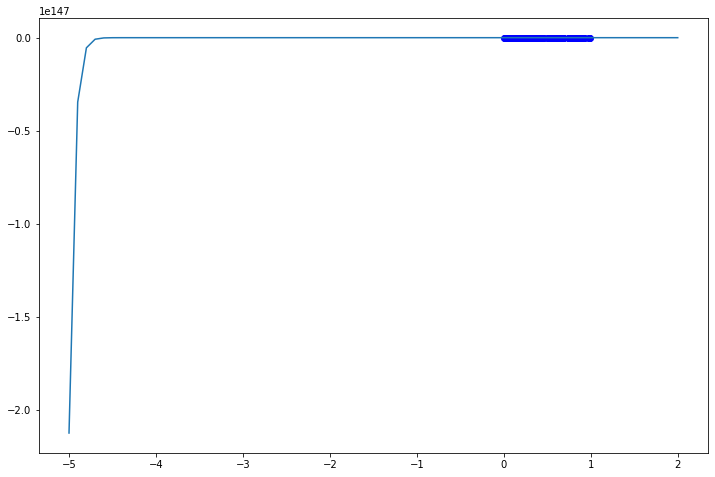

In [6]:
def divided_diff(x, y):
  
    n = len(y)
    coef = np.zeros([n, n])
 
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):

    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p


a_s = divided_diff(x_file, y_file)[0, :]


x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x_file, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x_file, y_file, 'bo')
plt.plot(x_new, y_new)

Интерполяция (numpy, Лагранж)

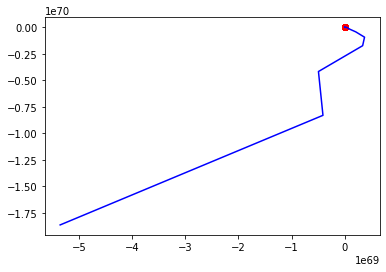

In [7]:
x_parabola = np.array(x_file) 
y_parabola = np.array(y_file) 
plt.figure()
u = plt.plot(x_parabola,y_parabola,'ro') 
t = np.linspace(0, 1, len(x_parabola)) 
pxLagrange = scipy.interpolate.lagrange(t, x_parabola) 
pyLagrange = scipy.interpolate.lagrange(t, y_parabola) 
n = 100
ts = np.linspace(t[0],t[-1],n)
xLagrange = pxLagrange(ts) 
yLagrange = pyLagrange(ts) 
plt.plot(xLagrange, yLagrange,'b-',label = "Polynomial")
plt.show()

5. Аппроксимация квадратичной функцией

Формат входных данных:
а) CSV файл с массивом точек в формате [x i ,y i ] или массив точек в
формате [x,y];

Формат выходных данных:
а) Массив точек в формате [x i , y i , f i ] (fi – значение аппроксимирующей
функции в точках)

б) Вид аппроксимирующей функции - в формате строки содержащий
каноничную форму аппроксимирующей функции с вычисленными
коэффициентами отсортированный в порядке убывания степеней x, для
которых определенные для функции коэффициенты отличны от нуля)

в) Величина дисперсии (формула вычисления: )

Коэффециенты
-0.14843480748644486 0.586760670980061


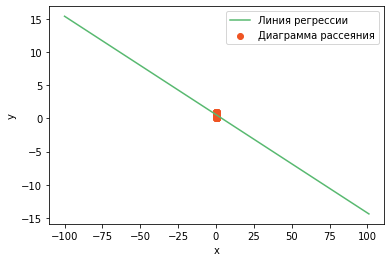

In [8]:
X = x_file
Y = y_file
mean_x = np.mean(X)
mean_y = np.mean(Y)
 

n = len(X)


numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    m = numer / denom
    c = mean_y - (m * mean_x)
 

print("Коэффециенты")
print(m, c)


 
max_x = np.max(X) + 100
min_x = np.min(X) - 100
 

x = np.linspace(min_x, max_x, 1000)
y = c + m * x


plt.plot(x, y, color='#58b970', label='Линия регрессии')

plt.scatter(X, Y, c='#ef5423', label='Диаграмма рассеяния')
 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Гиперболическая аппроксимация

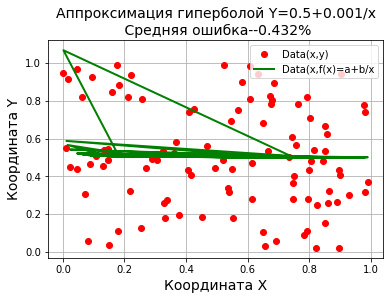

In [9]:
import matplotlib as mpl

def mnkGP(x,y): 
              n=len(x) 
              s=sum(y) 
              s1=sum([1/x[i] for i in  range(0,n)]) 
              s2=sum([(1/x[i])**2 for i in  range(0,n)]) 
              s3=sum([y[i]/x[i]  for i in range(0,n)])                     
              a= round((s*s2-s1*s3)/(n*s2-s1**2),3) 
              b=round((n*s3-s1*s)/(n*s2-s1**2),3)
              s4=[a+b/x[i] for i in range(0,n)]          
              so=round(sum([abs(y[i] -s4[i]) for i in range(0,n)])/(n*sum(y))*100,3)   
              plt.title('Аппроксимация гиперболой Y='+str(a)+'+'+str(b)+'/x\n Средняя ошибка--'+str(so)+'%',size=14)
              plt.xlabel('Координата X', size=14)
              plt.ylabel('Координата Y', size=14)
              plt.plot(x, y, color='r', linestyle=' ', marker='o', label='Data(x,y)')
              plt.plot(x, s4, color='g', linewidth=2, label='Data(x,f(x)=a+b/x')
              plt.legend(loc='best')
              plt.grid(True)
              plt.show()
x = x_file 
y = y_file
mnkGP(x,y)

Аппроксимация (МНК) numpy

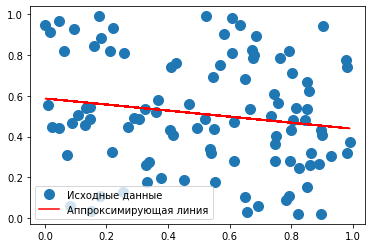

In [10]:
x = np.array(x_file)
y = np.array(y_file)
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
_ = plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
_ = plt.plot(x, m*x + c, 'r', label='Аппроксимирующая линия')
_ = plt.legend()
plt.show()

Аппроксимация функцией нормального распределения (с подгонкой scipy)

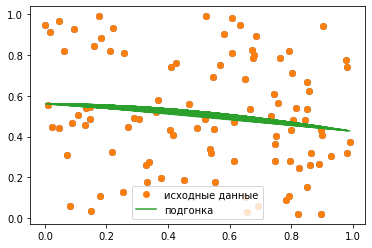

In [14]:
def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

xdata = np.asarray(x_file)
ydata = np.asarray(y_file)
plt.plot(xdata, ydata, 'o')

def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata)
  
fit_A = parameters[0]
fit_B = parameters[1]
  
fit_y = Gauss(xdata, fit_A, fit_B)
plt.plot(xdata, ydata, 'o', label='исходные данные')
plt.plot(xdata, fit_y, '-', label='подгонка')
plt.legend()

Аппроксимация функцией нормального распределения (без подгонки scipy)

Введите превую точку: 1
Введите вторую точку: 3
Введите шаг: 0.5
[0.0922873096181894, -0.2386299462631369, 0.6007370053151277]
[0.0922873096181894, 0.2386299462631369, 0.6007370053151277]


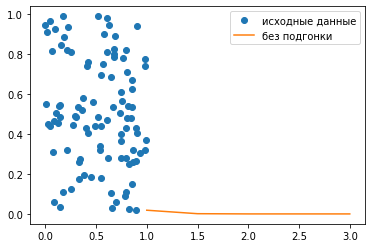

In [16]:
#функции для решения СЛАУ
def det22(matrix): 
    return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
 
def minor_matrix(matrix, i, j): 
    tmp = [row for k, row in enumerate(matrix) if k != i]
    tmp = [col for k, col in enumerate(zip(*tmp)) if k != j]
    return tmp
 
def Determinant_matrix(matrix): 
    if (len(matrix)) == (len(matrix[0])):
        size = len(matrix)
        if size == 2:
            return det22(matrix)
        return sum((-1) ** j * matrix[0][j] * Determinant_matrix(minor_matrix(matrix, 0, j))
                   for j in range(size))

def Cramers_rule(matrix, vector):
    det = Determinant_matrix(matrix)
    if det != 0:
        matrix_a = [[], [], []]
        matrix_b = [[], [], []]
        matrix_c = [[], [], []]
        
        for i in range(len(matrix)):
            matrix_a[i].append(vector[i])
            matrix_a[i].append(matrix[i][1])
            matrix_a[i].append(matrix[i][2])
            
            matrix_b[i].append(matrix[i][0])
            matrix_b[i].append(vector[i])
            matrix_b[i].append(matrix[i][2])
            
            matrix_c[i].append(matrix[i][0])
            matrix_c[i].append(matrix[i][1])
            matrix_c[i].append(vector[i])
        
        solution = []
        solution.append(Determinant_matrix(matrix_a)/det)
        solution.append(Determinant_matrix(matrix_b)/det)
        solution.append(Determinant_matrix(matrix_c)/det)
        return solution
    
    else:
        solution = [0, 0, 0]
        return solution
   
# сама функция
def normal_distribution(x, y, interval_0, interval_1, step):
    normal_massive_x = []
    normal_massive_y = []
    xx = interval_0
    a = [[],[],[]]
    b = []
    s1 = 0; s2 = 0; s3 = 0; s4 = 0; s5 = 0; s6 = 0; s7 = 0;
    for i in range(len(x)):
        s1 = s1 + x[i] ** 4
        s2 = s2 + x[i] ** 3
        s3 = s3 + x[i] ** 2
        s4 = s4 + x[i]
        s5 = s5 + (x[i] ** 2) * y[i]
        s6 = s6 + x[i] * y[i]
        s7 = s7 + y[i]
        
    a[0].append(s1)
    a[0].append(s2)
    a[0].append(s3)
    
    a[1].append(s2)
    a[1].append(s3)
    a[1].append(s4)
    
    a[2].append(s3)
    a[2].append(s4)
    a[2].append(len(x))
    
    b.append(s5)
    b.append(s6)
    b.append(s7)
    
    a_1 = Cramers_rule(a, b) 
    print(a_1)
    
    for i in range(len(a_1)):
        if a_1[i] < 0:
            a_1[i] = a_1[i] * (-1)
    print(a_1)
    
    for r in range(0, int((interval_1 - interval_0) / step) + 1):
        try: 
            yy = a_1[0] * math.e ** (-(((xx - a_1[1]) ** 2)/a_1[2] ** 2))
        except ZeroDivisionError:
            yy = 0
        normal_massive_x.append(xx)
        normal_massive_y.append(yy)
        xx = xx + step
    return normal_massive_x, normal_massive_y

a = normal_distribution(x_file, y_file, float(input("Введите превую точку: ")), float(input("Введите вторую точку: ")), float(input("Введите шаг: ")))

plt.plot(x_file, y_file, 'o', label='исходные данные')
plt.plot(a[0], a[1], '-', label='без подгонки')
plt.legend()